### Import Statements

Below is boilerplate code for import statements and a basic configuration for ignoring GELSD warnings

`%matplotlib inline` enables Jupyter Notebooks to display matplotlib plots inline

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Dataset Load

The Boston housing dataset is loaded from the stock sklearn dataset database.

In [4]:
# from sklearn.datasets import load_boston
# boston = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [9]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [11]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
housing.data.shape

(20640, 8)

In [13]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Convert the Boston Dataset into a Dataframe

The Boston dataset, which is a dictionary, can be easily converted into a Pandas DataFrame. We use the `.head()` method to visualize the first 5 values in the df.

In [15]:
df = pd.DataFrame(housing.data)
df.columns = housing.feature_names

In [16]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
housing.target[:5]
df["PRICE"] = housing.target

In [22]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### LinearRegression Import Statements

We use the `fit` function to train the model to understand patterns in the **X** dataframe against the `df["PRICE"]` target variable set.

In [24]:
from sklearn.linear_model import LinearRegression

X = df.drop("PRICE", axis=1)

In [31]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
df[["PRICE"]]

,PRICE
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [36]:
linear_model = LinearRegression()
linear_model.fit(X, df["PRICE"])

LinearRegression()

In [37]:
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [29]:
len(linear_model.coef_)

13

### Visualize the Estimated Coefficients against the Dataset columns

We can easily plot it in a DataFrame using the `zip` function of Python. Here we zip `linear_model.coef_` against the column names of **X**.

In [48]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))


,0,1
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514


In [65]:
from itertools import product

row = list(X.iloc[0])
beta = list(linear_model.coef_)

row

[8.3252,
 41.0,
 6.984126984126984,
 1.0238095238095237,
 322.0,
 2.5555555555555554,
 37.88,
 -122.23]

In [66]:
beta

[0.4366932931343258,
 0.009435778033238681,
 -0.10732204139090444,
 0.6450656935198146,
 -3.9763894212323075e-06,
 -0.003786542654970941,
 -0.4213143775271414,
 -0.4345137546747753]

In [72]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))


,0,1
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514


In [71]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Plotting and Visualization

I'm using the matplotlib style *fivethirtyeight* as a theme for my notebooks. A scatter plot with `df["RM"]` as the independent variable and the `df["PRICE"]` column as the dependent variable.

Text(0.5, 1.0, 'Relationship between MedInc Price')

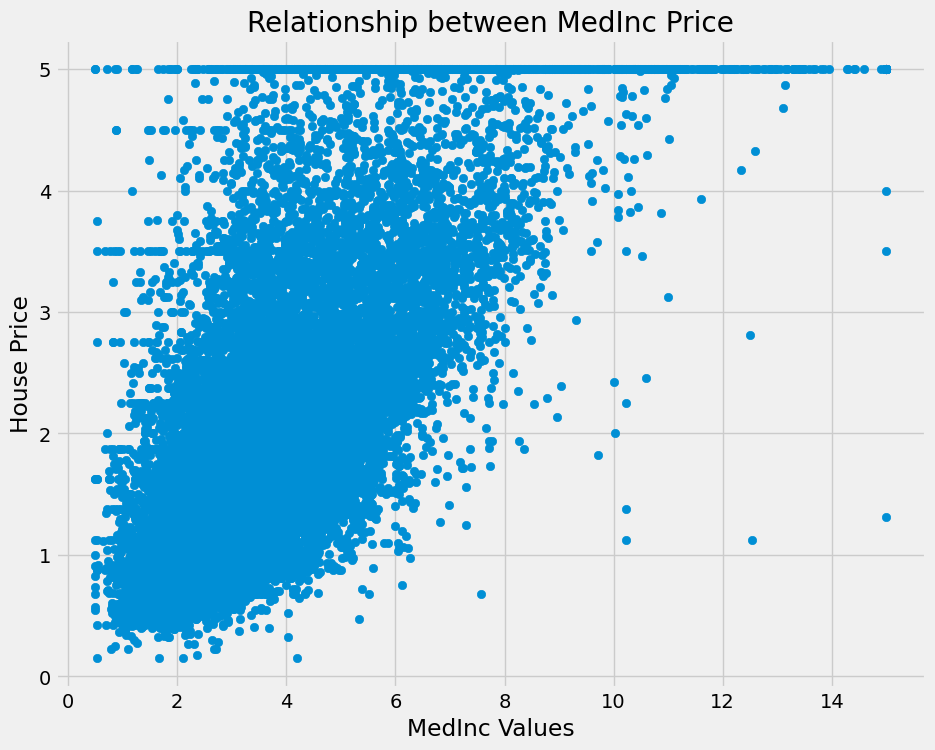

In [75]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["MedInc"], df["PRICE"])
plt.xlabel("MedInc Values")
plt.ylabel("House Price")
plt.title("Relationship between MedInc Price")

In [76]:
predictions = linear_model.predict(X)

In [77]:
predictions

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [78]:
df["PRED"] = predictions

In [79]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,PRED
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.131650
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.976606
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.676571
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.241598
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.413587
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2.675277
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,2.395394
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,2.246688
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,1.791627
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,2.428328


### Plotting and Visualization revisited

Here we compare the predicted prices against the actual prices to see if there is a linear correlation between the two variables. 

Text(0.5, 1.0, 'Price vs Predicted Price')

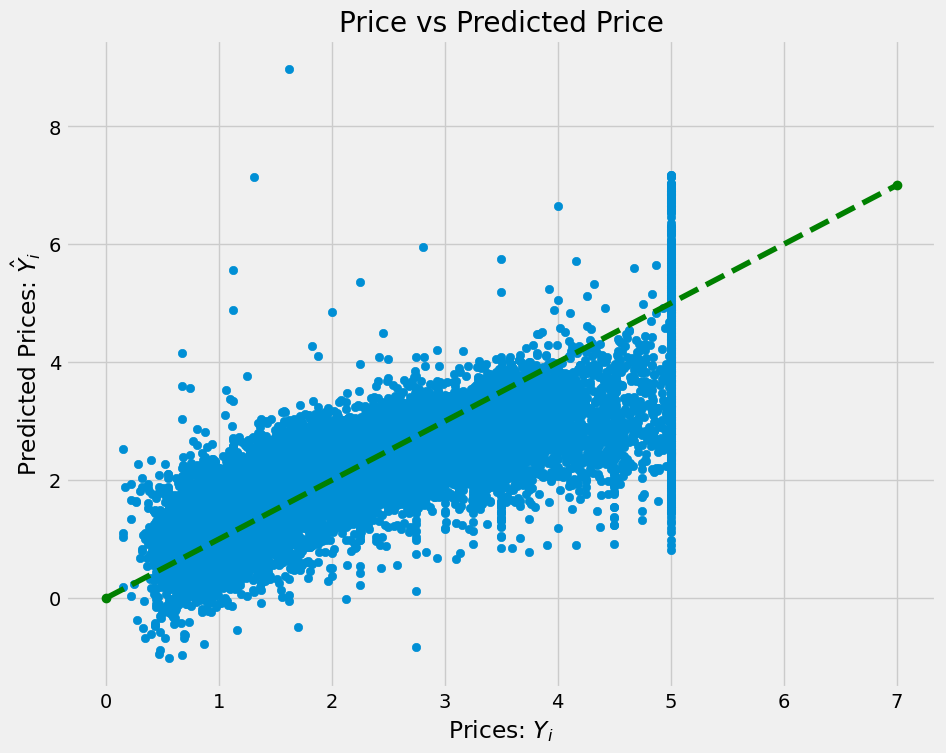

In [82]:
plt.figure(figsize=(10,8))


plt.scatter(df["PRICE"], linear_model.predict(X))
plt.plot([0, 7], [0, 7], '--go')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Price vs Predicted Price")

In [83]:
mean_squared_error = np.mean((df["PRICE"] - linear_model.predict(X))**2)
mean_squared_error

0.5243209861846072

In [84]:
linear_model.score(X, df["PRICE"])

0.606232685199805